# MODULO 3

## Carga de librerias comprobacion de versiones

In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [18]:
print(f"Pandas: {pd.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Numpy: {np.__version__}")

Pandas: 2.2.3
Seaborn: 0.13.2
Numpy: 2.2.0


## Carga del DataFrame

In [19]:
df = pd.read_csv("diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Analisis Previo

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53939 non-null  float64
 1   cut      53937 non-null  object 
 2   color    53938 non-null  object 
 3   clarity  53938 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53938 non-null  float64
 6   price    53938 non-null  object 
 7   x        53938 non-null  object 
 8   y        53939 non-null  float64
 9   z        53939 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


## Comprobar si hay valores "?" sustituirlos por NaN y volver a comprobar.

Lo sustituyo por NaN porque luego voy a cambiar los valores NaN por diferentes valores y para no hacer la misma operacion 2 veces

In [21]:
(df=='?').any()

carat      False
cut         True
color       True
clarity    False
depth      False
table      False
price       True
x           True
y          False
z          False
dtype: bool

In [22]:
df.replace('?', np.nan, inplace=True)
(df=='?').any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

Ya no hay valores '?' en mi DataFrame

## Cambio de tipo:
 * ### 'price' y 'x' de odject a float64
 * ### object a category

In [32]:
df[['price', 'x']] = df[['price', 'x']].astype(float)
for col in df:
    if df[col].dtype == object:
        df[col]=df[col].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53939 non-null  float64 
 1   cut      53936 non-null  category
 2   color    53937 non-null  category
 3   clarity  53938 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53938 non-null  float64 
 6   price    53937 non-null  float64 
 7   x        53937 non-null  float64 
 8   y        53939 non-null  float64 
 9   z        53939 non-null  float64 
dtypes: category(3), float64(7)
memory usage: 3.0 MB


## Comprobar y rellenar Nulos

In [48]:
df.isna().sum()

# Uso el print para comprobar que valores he añadido

for col in df:
    if df[col].dtype == 'category':
        mode = Counter(df[col]).most_common()[0][0]
        df[col]=df[col].fillna(mode)
        print(f"Moda {col} = {mode}")
    else:
        mean = round(df[col].mean(), 2)
        df[col]=df[col].fillna(mean)
        print(f"Media {col} = {mean}")


Media carat = 0.8
Moda cut = Ideal
Moda color = G
Moda clarity = SI1
Media depth = 61.75
Media table = 57.46
Media price = 3932.54
Media x = 5.73
Media y = 5.73
Media z = 3.54


### Comprobamos que no hay nulos

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  float64 
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(7)
memory usage: 3.0 MB


In [50]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Nueva Columna usando apply

* ### price_iva

In [52]:
df['price_iva'] = df['price'].apply(lambda x : 1.21*x)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_iva
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,394.46
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,394.46
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,395.67
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,404.14
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,405.35


* ### volume

In [58]:
def volume(row):
    return round(row['x']*row['y']*row['z'], 2)
df['volume'] = df.apply(volume, axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_iva,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,394.46,38.20
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,394.46,34.51
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,395.67,38.08
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,404.14,46.72
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,405.35,51.92


## Ordenar por 2 columnas Cut y Price

In [ ]:
df.sort_values(['cut', 'price'], ascending=[True, False], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_iva,volume
0,2.01,Fair,G,SI1,70.6,64.0,18574.0,7.43,6.64,4.69,22474.54,231.38
1,2.02,Fair,H,VS2,64.5,57.0,18565.0,8.00,7.95,5.14,22463.65,326.90
2,4.50,Fair,J,I1,65.8,58.0,18531.0,10.23,10.16,6.72,22422.51,698.46
3,2.00,Fair,G,VS2,67.6,58.0,18515.0,7.65,7.61,5.16,22403.15,300.40
4,2.51,Fair,H,SI2,64.7,57.0,18308.0,8.44,8.50,5.48,22152.68,393.14


## Groupby

In [64]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'price_iva', 'volume'],
      dtype='object')

* ### cut

In [ ]:
df.groupby('cut')[['carat', 'depth', 'table', 'price']].agg(['mean', 'max', 'min'])


C:\Users\p-rom\AppData\Local\Temp\ipykernel_7832\138065372.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('cut')[['carat', 'depth', 'table', 'price']].agg(['mean', 'max', 'min'])


carat                  depth                  table              \
               mean   max   min       mean   max   min       mean   max   min   
cut                                                                             
Fair       1.046137  5.01  0.22  64.041677  79.0  43.0  59.053789  95.0  49.0   
Good       0.849185  3.01  0.23  62.365879  67.0  54.3  58.694639  66.0  51.0   
Ideal      0.702888  3.50  0.20  61.709446  66.7  43.0  55.951951  63.0  43.0   
Premium    0.891981  4.01  0.20  61.264673  63.0  58.0  58.745944  62.0  51.0   
Very Good  0.806307  4.00  0.20  61.818212  64.9  56.8  57.955977  66.0  44.0   

                 price                  
                  mean      max    min  
cut                                     
Fair       4358.757764  18574.0  337.0  
Good       3929.241447  18788.0  327.0  
Ideal      3458.137893  18806.0  326.0  
Premium    4584.257704  18823.0  326.0  
Very Good  3979.489659  18818.0  336.0

* ### color

In [67]:
df.groupby('color')[['carat', 'depth', 'table', 'price']].agg(['mean', 'max', 'min'])

C:\Users\p-rom\AppData\Local\Temp\ipykernel_7832\4011007590.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('color')[['carat', 'depth', 'table', 'price']].agg(['mean', 'max', 'min'])


carat                  depth                  table              \
           mean   max   min       mean   max   min       mean   max   min   
color                                                                       
D      0.657833  3.40  0.20  61.698110  71.6  52.2  57.404945  73.0  52.0   
E      0.657867  3.05  0.20  61.662090  79.0  51.0  57.491201  73.0  44.0   
F      0.736538  3.01  0.20  61.694582  71.0  52.3  57.433536  95.0  50.0   
G      0.771326  3.01  0.23  61.757137  72.9  43.0  57.288401  76.0  52.0   
H      0.911799  4.13  0.23  61.836850  71.8  52.7  57.517811  73.0  50.0   
I      1.026689  4.01  0.23  61.846357  71.3  50.8  57.577001  70.0  43.0   
J      1.162137  5.01  0.23  61.887215  73.6  43.0  57.812393  68.0  51.6   

             price                  
              mean      max    min  
color                               
D      3170.275908  18693.0  357.0  
E      3076.752475  18731.0  326.0  
F      3723.447971  18791.0  342.0  
G      4000.080220  18818.0  354.0  
H      4486.891924  18803.0  337.0  
I      5089.202461  18823.0  334.0  
J      5323.818020  18710.0  335.0

* ### clarity

In [68]:
df.groupby('clarity')[['carat', 'depth', 'table', 'price']].agg(['mean', 'max', 'min'])

C:\Users\p-rom\AppData\Local\Temp\ipykernel_7832\3097394055.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('clarity')[['carat', 'depth', 'table', 'price']].agg(['mean', 'max', 'min'])


carat                  depth                  table              \
             mean   max   min       mean   max   min       mean   max   min   
clarity                                                                       
I1       1.283846  5.01  0.30  62.734278  78.2  55.6  58.303779  67.0  52.0   
IF       0.505123  2.29  0.23  61.510615  65.6  52.3  56.507207  65.0  52.0   
SI1      0.850533  2.57  0.21  61.853249  72.9  43.0  57.662475  95.0  49.0   
SI2      1.077648  3.04  0.20  61.772167  72.2  53.1  57.927181  79.0  50.1   
VS1      0.727125  2.59  0.23  61.667075  71.8  50.8  57.314945  73.0  43.0   
VS2      0.763914  3.51  0.20  61.724427  79.0  43.0  57.417391  73.0  51.0   
VVS1     0.503321  2.31  0.23  61.624651  67.6  54.0  56.884460  68.0  52.0   
VVS2     0.596202  2.07  0.23  61.663778  67.6  51.0  57.024990  68.0  51.0   

               price                  
                mean      max    min  
clarity                               
I1       3924.168691  18531.0  345.0  
IF       2864.839106  18806.0  369.0  
SI1      3995.232076  18818.0  326.0  
SI2      5063.028606  18804.0  326.0  
VS1      3839.211873  18795.0  327.0  
VS2      3924.828839  18823.0  334.0  
VVS1     2523.114637  18777.0  336.0  
VVS2     3283.737071  18768.0  336.0

## Seaborn EDAS:

### Univariantes

<Axes: xlabel='price', ylabel='Count'>

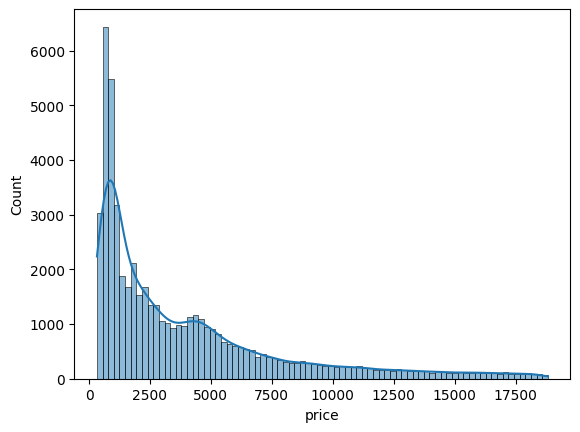

In [83]:
sns.histplot(df, x='price', kde=True)

### Bivariantes y multivariantes

<Axes: xlabel='carat', ylabel='price'>

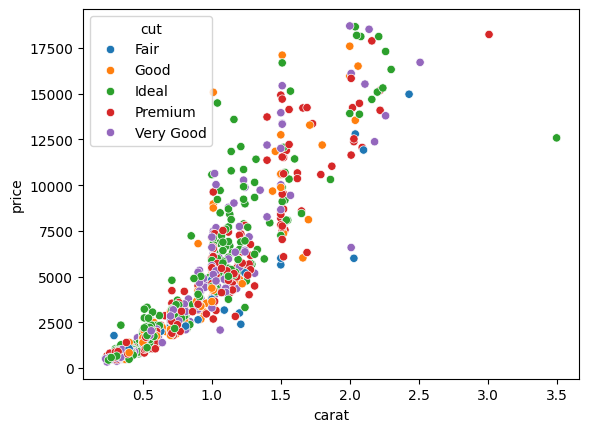

In [85]:
sns.scatterplot(df.sample(1000), x='carat', y='price', hue='cut')

<Axes: >

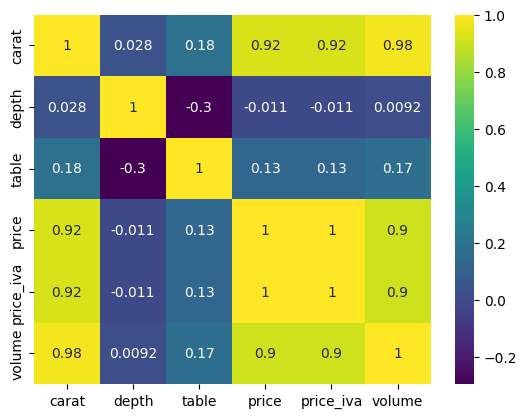

In [ ]:
#No tengo en cuenta price_iva porque es igual a price pero multiplicado por una constante
#No tengo en cuenta x, y, z porque volume es un valor dependiente de las 3

df_corr=df[['carat', 'depth', 'table', 'price', 'volume']]
df_corr.head()

m_corr=df_corr.corr()

sns.heatmap(m_corr, annot=True, cmap='viridis')


<Axes: xlabel='None'>

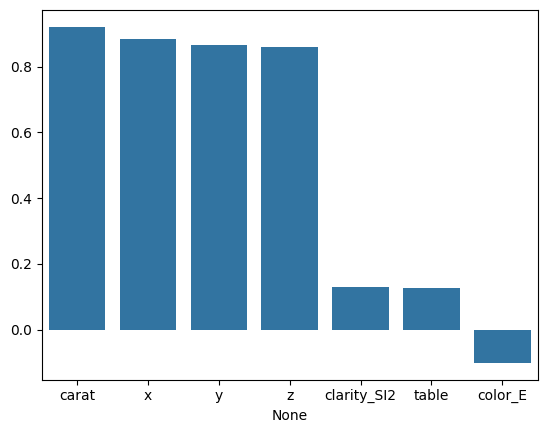

In [ ]:
# Elimino price, price_iva porque son redundantes para compararlas con el precio 
# y en esta ocasion quiero ver que variable del volumen es la que mas influye por eso quito volume
# pero dejo x, y, z

price_correlation=pd.get_dummies(df).corr()['price'].drop(['price','price_iva','volume'])

price_correlation

filter = (price_correlation > 0.1) | (price_correlation < -0.1)
filtered_corretation = price_correlation[filter]

filtered_corretation.sort_values(ascending=False, inplace=True)
sns.barplot(x=filtered_corretation.index, y=filtered_corretation.values)